### We’ll be using logistic regression to predict whether a person has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc.

### Import Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [39]:
data=pd.read_csv('/home/parth/Desktop/diabetes.csv')

In [40]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Exploratory Data Analysis

In [48]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [49]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### In this dataset we don't have Null values but we have some columns that contain value which are 0, and that doesn't make sense for example glucose,blood pressure can't be 0 so we'll replace those value with NaN and then replace those NaN with their respective mean

In [86]:
# replicated new dataset named "diabetes_data" from "data" and i'll work on diabetes_data
diabetes_data=data.copy() 

In [52]:
# replacing 0 with np.NaN
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']]=diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0,np.NaN)

In [53]:
# Here we get total number of null values in each column
diabetes_data.isnull().sum() 

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### Replacing Null values with their respective mean

In [55]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(),inplace=True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(),inplace=True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].mean(),inplace=True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].mean(),inplace=True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].mean(),inplace=True)

In [83]:
 # as we replaced null values with mean,so there is no Null values in this dataset 
diabetes_data.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

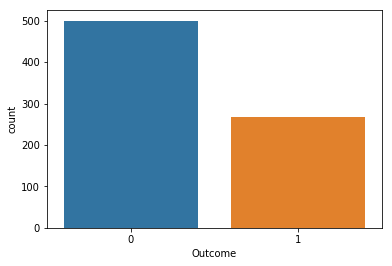

In [78]:
sns.countplot(x='Outcome',data=diabetes_data)

#### Creating scatterplot to show Age versus Glucose.

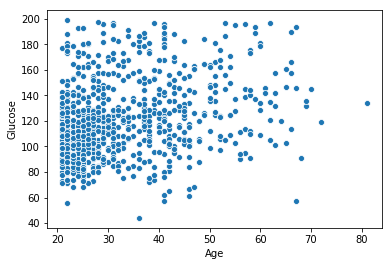

In [79]:
sns.scatterplot(x='Age',y='Glucose',data=diabetes_data)

#### Creating scatterplot to show Age versus BloodPressure.

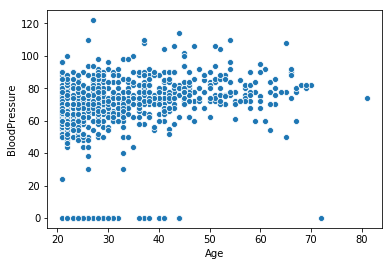

In [80]:
sns.scatterplot(x='Age',y='BloodPressure',data=data)

#### Creating Heatmap

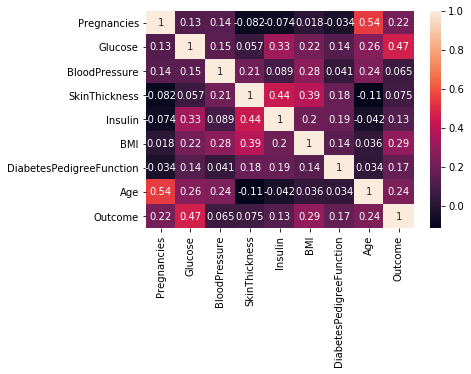

In [82]:
corr=data.corr()
sns.heatmap(corr,annot=True)

### Logistic Regression

#### Split the data into training set and testing set using train_test_split.

In [11]:
from sklearn.model_selection import train_test_split

In [57]:
x=diabetes_data[['Glucose', 'BloodPressure','DiabetesPedigreeFunction', 'Age']]
y=diabetes_data[['Outcome']]

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=40)

#### Train and fit a logistic regression model on the training set.

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/home/parth/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predictions and Evaluations


#### Now predict values for the testing data.

In [73]:
pred=lr.predict(x_test)

#### Create a classification report for the model.

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       142
           1       0.82      0.56      0.67        89

    accuracy                           0.78       231
   macro avg       0.80      0.74      0.75       231
weighted avg       0.79      0.78      0.77       231

